In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [26]:
single_image = x_train[0]

In [27]:
single_image


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

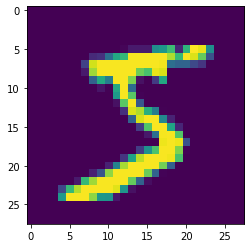

In [28]:
plt.imshow(single_image)

In [29]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
y_train.shape

(60000,)

In [32]:
y_example = to_categorical(y_train)

In [33]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [34]:
y_example.shape

(60000, 10)

In [35]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [36]:
y_cat_train = to_categorical(y_train,10)

In [37]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [38]:
single_image.max()

255

In [39]:
x_train = x_train/255

In [40]:
x_test = x_test/255

In [41]:
x_train.shape

(60000, 28, 28)

In [42]:
# Batch size
x_train = x_train.reshape(60000,28,28,1)

In [43]:
x_test = x_test.reshape(10000,28,28,1)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

# Output layers
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [46]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
         callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1408 - accuracy: 0.9579 - val_loss: 0.0551 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.0477 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0411 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0415 - val_accuracy: 0.9871


In [48]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

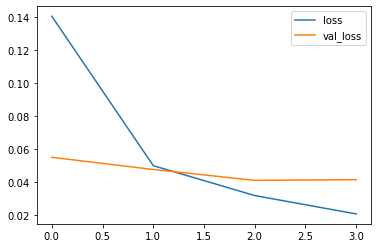

In [50]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

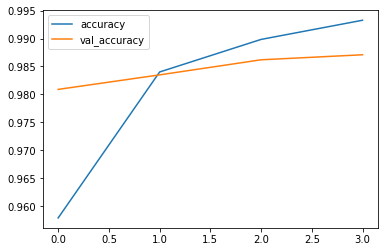

In [51]:
metrics[['accuracy','val_accuracy']].plot()

In [52]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0415 - accuracy: 0.9871


[0.041525520384311676, 0.9871000051498413]

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [56]:
confusion_matrix(y_test,predictions)

array([[ 976,    0,    0,    0,    0,    0,    2,    0,    1,    1],
       [   1, 1129,    2,    0,    0,    0,    0,    1,    1,    1],
       [   1,    1, 1021,    3,    1,    0,    1,    4,    0,    0],
       [   0,    0,    4,  993,    0,    6,    0,    1,    2,    4],
       [   1,    0,    3,    0,  961,    0,    2,    0,    2,   13],
       [   0,    0,    0,    4,    0,  884,    1,    0,    0,    3],
       [   5,    1,    0,    1,    4,    1,  942,    0,    4,    0],
       [   0,    1,    3,    1,    0,    0,    0, 1019,    1,    3],
       [   6,    0,    1,    2,    1,    0,    2,    2,  955,    5],
       [   0,    2,    0,    1,    5,    4,    0,    3,    3,  991]],
      dtype=int64)

In [57]:
my_number = x_test[0]

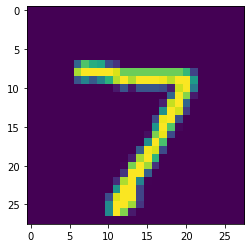

In [58]:
plt.imshow(my_number)

In [60]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)